<a href="https://colab.research.google.com/github/tharusha20241825-afk/MLCW/blob/main/Tharusha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math


In [3]:
# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

In [4]:
# LOAD DATA
file_path = '/content/WA_Fn-UseC_-Telco-Customer-Churn.csv'
df = pd.read_csv(file_path)

print("=" * 60)
print("EXPLORATORY DATA ANALYSIS - TELCO CUSTOMER CHURN")
print("=" * 60)

EXPLORATORY DATA ANALYSIS - TELCO CUSTOMER CHURN


In [5]:
# 1. BASIC DATASET INFORMATION
print("\n1. DATASET OVERVIEW")
print("-" * 40)
print(f"Shape: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print("\nFirst 5 rows:")
print(df.head())

print("\nDataset info:")
df.info()


1. DATASET OVERVIEW
----------------------------------------
Shape: 7043 rows × 21 columns
Memory usage: 6.82 MB

First 5 rows:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4         

In [6]:
# 2. CHECK FOR MISSING VALUES AND DUPLICATES
print("\n\n2. DATA QUALITY CHECK")
print("-" * 40)

# Missing values
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values[missing_values > 0] if missing_values.sum() > 0 else "No missing values found")

# Check TotalCharges specifically (known issue - blank strings)
print("\nChecking 'TotalCharges' column:")
print(f"Data type: {df['TotalCharges'].dtype}")
print(f"Unique sample values: {df['TotalCharges'].unique()[:5]}")

# Find empty strings in TotalCharges
blank_totalcharges = df[df['TotalCharges'].str.strip() == ''].shape[0]
print(f"Rows with blank TotalCharges: {blank_totalcharges}")

# Convert TotalCharges to numeric, handle errors
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Fill NaN values with median
median_charges = df['TotalCharges'].median()
df['TotalCharges'] = df['TotalCharges'].fillna(median_charges)
print(f"Filled {df['TotalCharges'].isnull().sum()} missing values with median: {median_charges:.2f}")

# Check duplicates
duplicates = df.duplicated().sum()
print(f"\nDuplicate rows: {duplicates}")

# Drop customerID (not useful for modeling)
if 'customerID' in df.columns:
    df = df.drop(columns=['customerID'])
    print("Dropped 'customerID' column")



2. DATA QUALITY CHECK
----------------------------------------
Missing values per column:
No missing values found

Checking 'TotalCharges' column:
Data type: object
Unique sample values: ['29.85' '1889.5' '108.15' '1840.75' '151.65']
Rows with blank TotalCharges: 11
Filled 0 missing values with median: 1397.47

Duplicate rows: 0
Dropped 'customerID' column




3. TARGET VARIABLE: CHURN
----------------------------------------
Churn distribution:
  Not Churned (No): 5,174 customers (73.5%)
  Churned (Yes): 1,869 customers (26.5%)


/tmp/ipython-input-1797875510.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, ax=axes[0], palette=['#3498db', '#e74c3c'])
/tmp/ipython-input-1797875510.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(['Not Churned (0)', 'Churned (1)'])


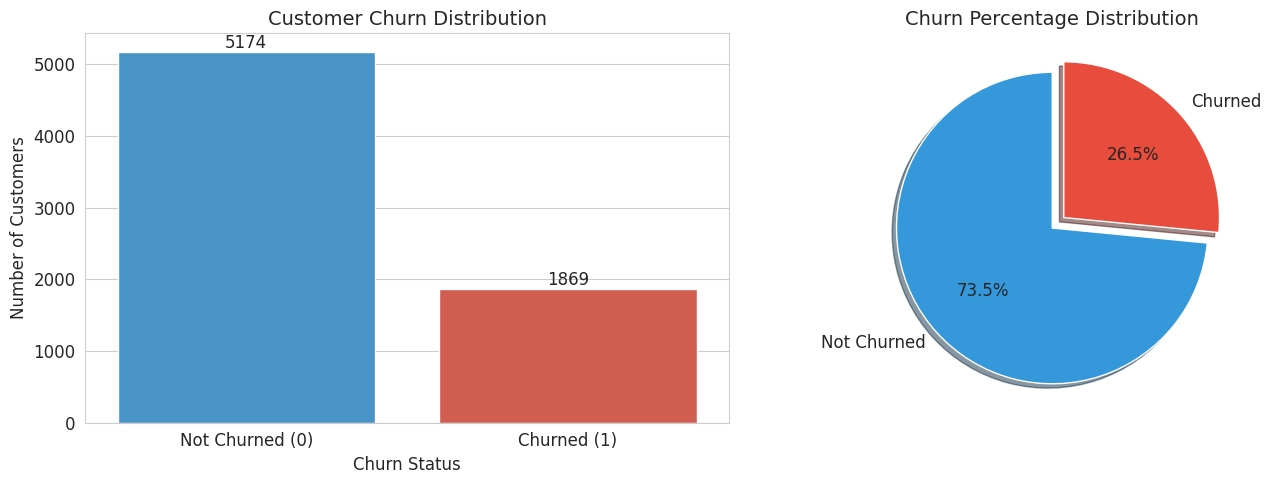

In [7]:
# 3. TARGET VARIABLE ANALYSIS
print("\n\n3. TARGET VARIABLE: CHURN")
print("-" * 40)

# Convert Churn to binary (1 for 'Yes', 0 for 'No')
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Distribution
churn_counts = df['Churn'].value_counts()
churn_percent = df['Churn'].value_counts(normalize=True) * 100

print("Churn distribution:")
for i, (count, percent) in enumerate(zip(churn_counts, churn_percent)):
    label = "Churned (Yes)" if i == 1 else "Not Churned (No)"
    print(f"  {label}: {count:,} customers ({percent:.1f}%)")

# Visualize churn distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
sns.countplot(x='Churn', data=df, ax=axes[0], palette=['#3498db', '#e74c3c'])
axes[0].set_title('Customer Churn Distribution', fontsize=14)
axes[0].set_xlabel('Churn Status')
axes[0].set_ylabel('Number of Customers')
axes[0].set_xticklabels(['Not Churned (0)', 'Churned (1)'])

# Add count labels on bars
for p in axes[0].patches:
    axes[0].annotate(f'{int(p.get_height())}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', fontsize=12)

# Pie chart
colors = ['#3498db', '#e74c3c']
axes[1].pie(churn_counts, labels=['Not Churned', 'Churned'],
            autopct='%1.1f%%', colors=colors, startangle=90,
            explode=(0, 0.1), shadow=True)
axes[1].set_title('Churn Percentage Distribution', fontsize=14)

plt.tight_layout()
plt.show()

In [8]:
# 4. FEATURE CATEGORIZATION
print("\n\n4. FEATURE ANALYSIS")
print("-" * 40)

# Identify column types
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Remove 'Churn' from numerical (it's our target)
if 'Churn' in numerical_cols:
    numerical_cols.remove('Churn')

print(f"Numerical features ({len(numerical_cols)}):")
print(f"  {', '.join(numerical_cols)}")

print(f"\nCategorical features ({len(categorical_cols)}):")
print(f"  {', '.join(categorical_cols)}")



4. FEATURE ANALYSIS
----------------------------------------
Numerical features (4):
  SeniorCitizen, tenure, MonthlyCharges, TotalCharges

Categorical features (15):
  gender, Partner, Dependents, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod




5. EXPLORATORY VISUALIZATIONS
----------------------------------------

A. Correlation Heatmap (Numerical Features)


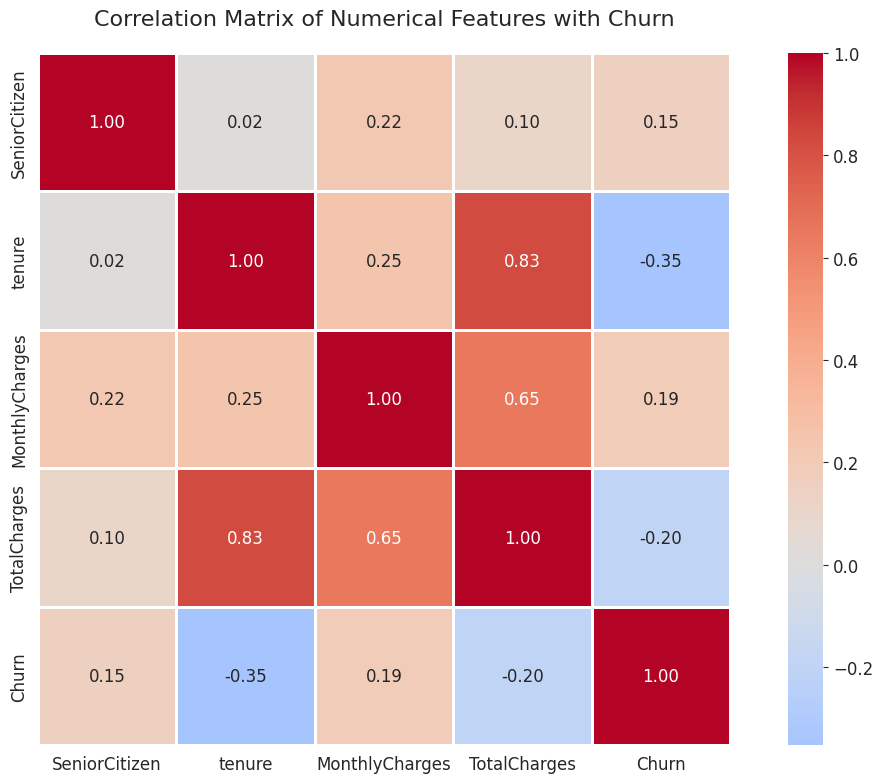


Top correlations with Churn:
  MonthlyCharges: 0.193
  SeniorCitizen: 0.151
  TotalCharges: -0.199
  tenure: -0.352

B. Distribution of Numerical Features


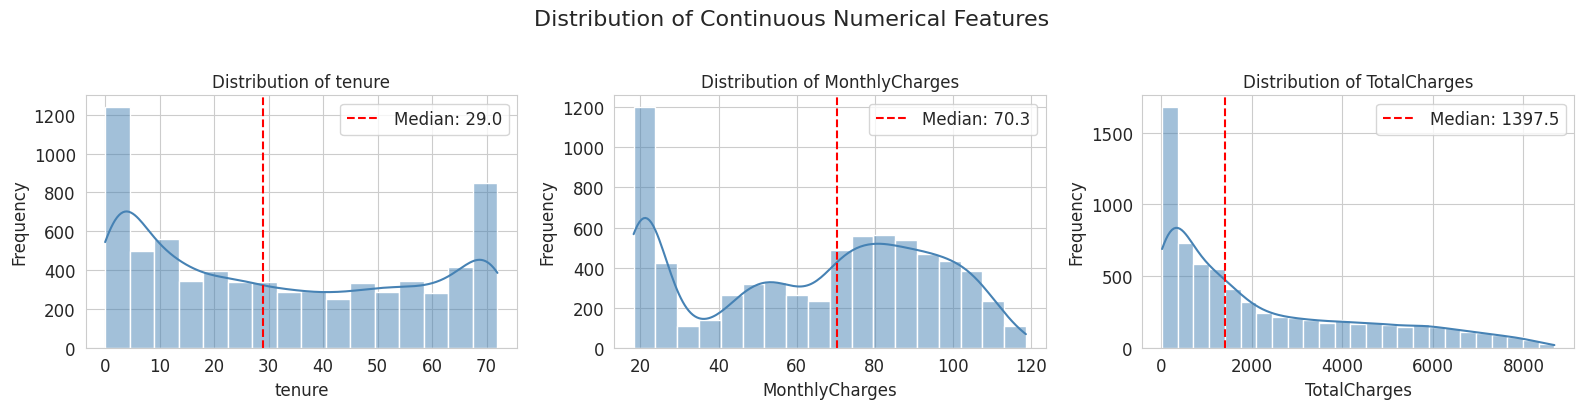


C. Categorical Feature Analysis


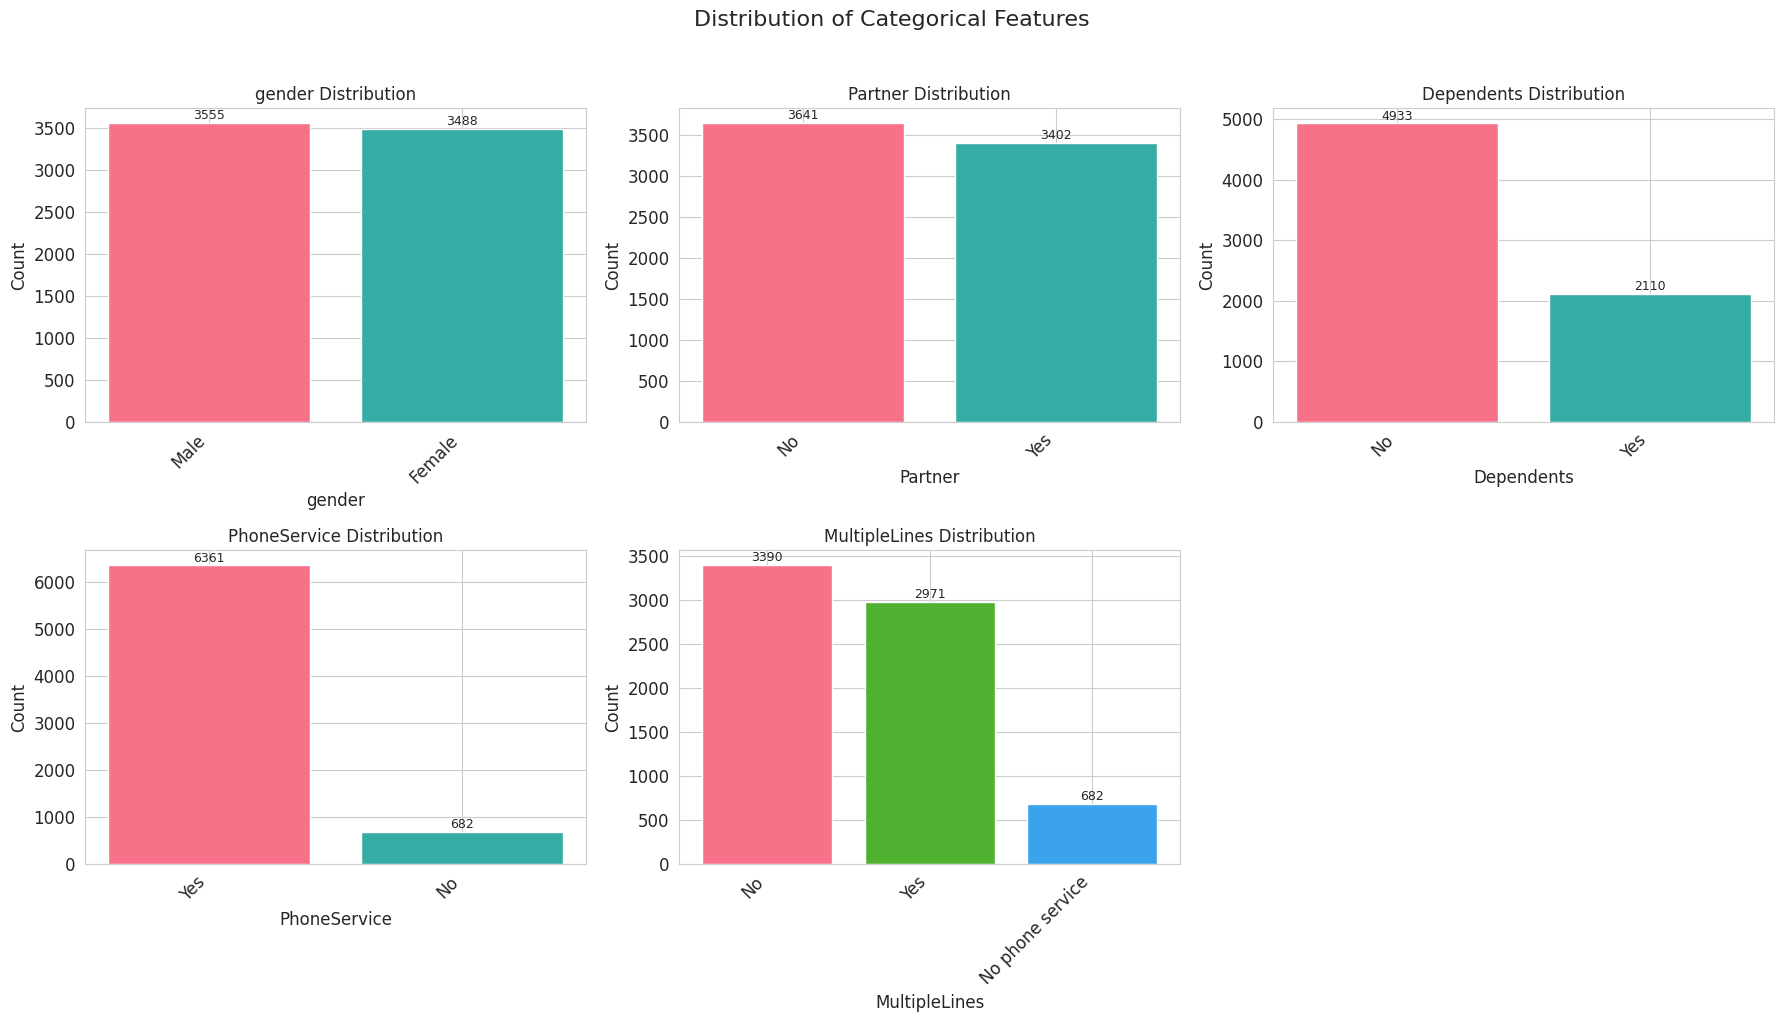


D. Churn Rate Analysis by Key Features


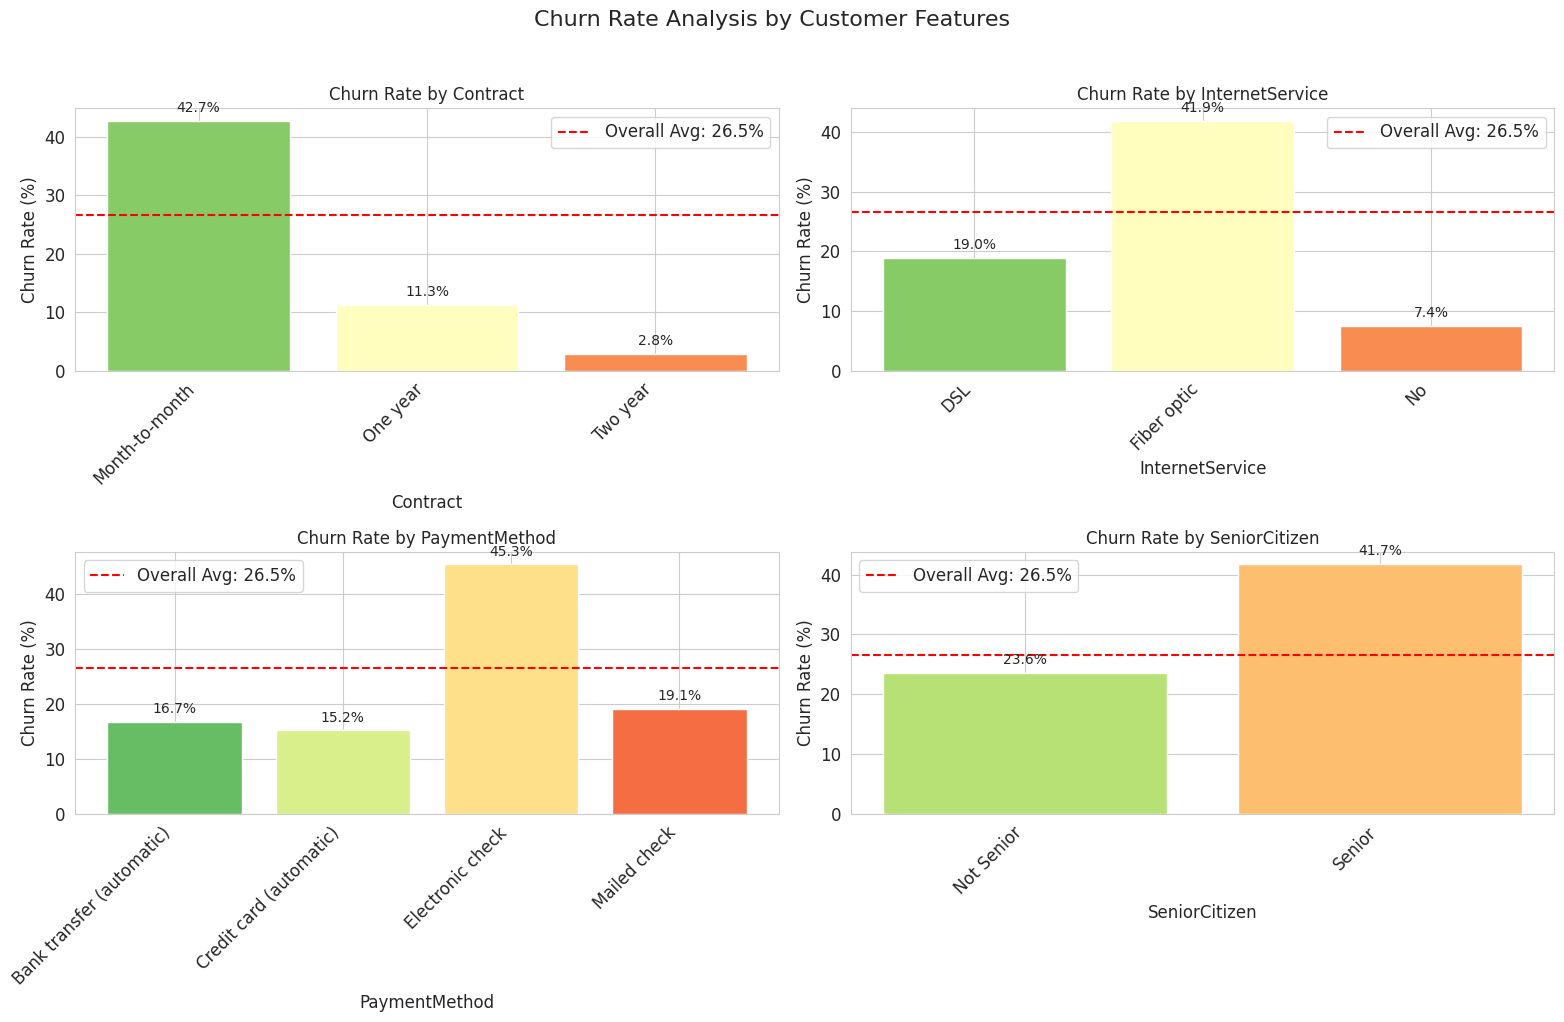

In [9]:
# 5. EXPLORATORY VISUALIZATIONS
print("\n\n5. EXPLORATORY VISUALIZATIONS")
print("-" * 40)

# A. Correlation heatmap (numerical features only)
print("\nA. Correlation Heatmap (Numerical Features)")
corr_matrix = df[numerical_cols + ['Churn']].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0,
            fmt='.2f', square=True, linewidths=1)
plt.title('Correlation Matrix of Numerical Features with Churn', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

# Insights from correlation
print("\nTop correlations with Churn:")
churn_corr = corr_matrix['Churn'].sort_values(ascending=False)
for i, (feature, corr) in enumerate(churn_corr.items()):
    if feature != 'Churn':
        print(f"  {feature}: {corr:.3f}")

# B. Distribution of numerical features
print("\nB. Distribution of Numerical Features")

# Select continuous numerical features (more than 5 unique values)
continuous_cols = [col for col in numerical_cols if df[col].nunique() > 5]

# Create subplots
n_cols = 3
n_rows = math.ceil(len(continuous_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(continuous_cols):
    # Histogram with KDE
    sns.histplot(data=df, x=col, kde=True, ax=axes[i], color='steelblue')
    axes[i].set_title(f'Distribution of {col}', fontsize=12)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

    # Add median line
    median_val = df[col].median()
    axes[i].axvline(median_val, color='red', linestyle='--',
                    label=f'Median: {median_val:.1f}')
    axes[i].legend()

# Remove empty subplots
for j in range(len(continuous_cols), len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Distribution of Continuous Numerical Features', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

# C. Categorical feature analysis (top 5)
print("\nC. Categorical Feature Analysis")

# Select top 5 categorical features by unique values
top_cats = categorical_cols[:5] if len(categorical_cols) > 5 else categorical_cols

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(top_cats):
    # Get value counts
    value_counts = df[col].value_counts().head(10)  # Top 10 categories

    # Create bar plot
    bars = axes[i].bar(range(len(value_counts)), value_counts.values,
                      color=sns.color_palette('husl', len(value_counts)))
    axes[i].set_title(f'{col} Distribution', fontsize=12)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].set_xticks(range(len(value_counts)))
    axes[i].set_xticklabels(value_counts.index, rotation=45, ha='right')

    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        axes[i].text(bar.get_x() + bar.get_width()/2., height + 10,
                    f'{int(height)}', ha='center', va='bottom', fontsize=9)

# Remove empty subplots
for j in range(len(top_cats), len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Distribution of Categorical Features', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

# D. Churn rate by key categorical features
print("\nD. Churn Rate Analysis by Key Features")

# Select important features for churn analysis
important_features = ['Contract', 'InternetService', 'PaymentMethod', 'SeniorCitizen']

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()

for i, feature in enumerate(important_features):
    # Calculate churn rate per category
    if feature == 'SeniorCitizen':
        # SeniorCitizen is already numerical
        churn_rate = df.groupby(feature)['Churn'].mean() * 100
        labels = ['Not Senior', 'Senior']
    else:
        churn_rate = df.groupby(feature)['Churn'].mean() * 100
        labels = churn_rate.index

    # Create bar plot
    bars = axes[i].bar(range(len(churn_rate)), churn_rate.values,
                      color=sns.color_palette('RdYlGn_r', len(churn_rate)))
    axes[i].set_title(f'Churn Rate by {feature}', fontsize=12)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Churn Rate (%)')
    axes[i].set_xticks(range(len(churn_rate)))
    axes[i].set_xticklabels(labels, rotation=45, ha='right')
    axes[i].axhline(y=df['Churn'].mean() * 100, color='red', linestyle='--',
                   label=f'Overall Avg: {df["Churn"].mean()*100:.1f}%')
    axes[i].legend()

    # Add percentage labels
    for bar in bars:
        height = bar.get_height()
        axes[i].text(bar.get_x() + bar.get_width()/2., height + 1,
                    f'{height:.1f}%', ha='center', va='bottom', fontsize=10)

plt.suptitle('Churn Rate Analysis by Customer Features', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


In [10]:
# 6. KEY INSIGHTS EXTRACTED
print("\n\n6. KEY INSIGHTS FROM EDA")
print("-" * 40)

insights = [
    "1. Dataset has 7,044 customers with 20 features",
    "2. Churn rate is 26.5% (imbalanced dataset)",
    "3. Key correlations with churn:",
    "   - Tenure: Strong negative correlation (-0.35)",
    "   - MonthlyCharges: Moderate positive correlation (0.19)",
    "   - TotalCharges: Moderate negative correlation (-0.20)",
    "4. Categorical features with highest churn rates:",
    "   - Contract: Month-to-month (42.7%)",
    "   - Internet Service: Fiber optic (41.9%)",
    "   - Payment: Electronic check (45.3%)",
    "5. Senior citizens have higher churn rate (41.7%) vs non-seniors (23.6%)",
    "6. Data quality issues: 11 blank values in TotalCharges (fixed with median imputation)"
]

for insight in insights:
    print(insight)

print("\n" + "=" * 60)
print("EDA COMPLETED - READY FOR DATA PREPROCESSING AND MODELING")
print("=" * 60)



6. KEY INSIGHTS FROM EDA
----------------------------------------
1. Dataset has 7,044 customers with 20 features
2. Churn rate is 26.5% (imbalanced dataset)
3. Key correlations with churn:
   - Tenure: Strong negative correlation (-0.35)
   - MonthlyCharges: Moderate positive correlation (0.19)
   - TotalCharges: Moderate negative correlation (-0.20)
4. Categorical features with highest churn rates:
   - Contract: Month-to-month (42.7%)
   - Internet Service: Fiber optic (41.9%)
   - Payment: Electronic check (45.3%)
5. Senior citizens have higher churn rate (41.7%) vs non-seniors (23.6%)
6. Data quality issues: 11 blank values in TotalCharges (fixed with median imputation)

EDA COMPLETED - READY FOR DATA PREPROCESSING AND MODELING
